# Data Processing

In [2]:
import pandas as pd
import ta
df = pd.read_csv('/content/MSFT.csv')
df.index = df['Date']
df = df.drop(['Date', 'Open', 'High', 'Low', 'Volume'], axis=1)
for i in range(1, 21):
    df[f'Close_{i}'] = df['Close'].shift(i)
df['RSI']=ta.momentum.RSIIndicator(df['Close_1'],window=20,fillna=False).rsi()
df = df.dropna()
start_date = '2019-01-01'
end_date = '2022-01-01'
df = df[(df.index >= start_date) & (df.index <= end_date)]
df

,Close,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,...,Close_12,Close_13,Close_14,Close_15,Close_16,Close_17,Close_18,Close_19,Close_20,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,96.023270,96.450584,95.330040,96.080246,95.491501,89.385597,93.278946,96.393639,98.463737,98.729607,...,103.933403,103.582069,103.116753,102.167168,99.536781,103.686523,103.050285,106.440353,105.300842,45.511186
2019-01-03,92.490768,96.023270,96.450584,95.330040,96.080246,95.491501,89.385597,93.278946,96.393639,98.463737,...,100.685799,103.933403,103.582069,103.116753,102.167168,99.536781,103.686523,103.050285,106.440353,44.979701
2019-01-04,96.792419,92.490768,96.023270,96.450584,95.330040,96.080246,95.491501,89.385597,93.278946,96.393639,...,97.704048,100.685799,103.933403,103.582069,103.116753,102.167168,99.536781,103.686523,103.050285,40.830463
2019-01-07,96.915901,96.792419,92.490768,96.023270,96.450584,95.330040,96.080246,95.491501,89.385597,93.278946,...,98.729607,97.704048,100.685799,103.933403,103.582069,103.116753,102.167168,99.536781,103.686523,47.087121
2019-01-08,97.618591,96.915901,96.792419,92.490768,96.023270,96.450584,95.330040,96.080246,95.491501,89.385597,...,98.463737,98.729607,97.704048,100.685799,103.933403,103.582069,103.116753,102.167168,99.536781,47.255646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,336.289154,328.668732,327.205597,321.401886,314.154633,317.974670,319.054810,328.629456,322.432983,333.294006,...,328.943756,328.894562,320.321655,317.198853,323.562286,324.141693,324.642517,330.573853,323.748840,54.308550
2021-12-28,335.110718,336.289154,328.668732,327.205597,321.401886,314.154633,317.974670,319.054810,328.629456,322.432983,...,327.107330,328.943756,328.894562,320.321655,317.198853,323.562286,324.141693,324.642517,330.573853,58.393470
2021-12-29,335.798126,335.110718,336.289154,328.668732,327.205597,321.401886,314.154633,317.974670,319.054810,328.629456,...,336.377502,327.107330,328.943756,328.894562,320.321655,317.198853,323.562286,324.141693,324.642517,57.555861


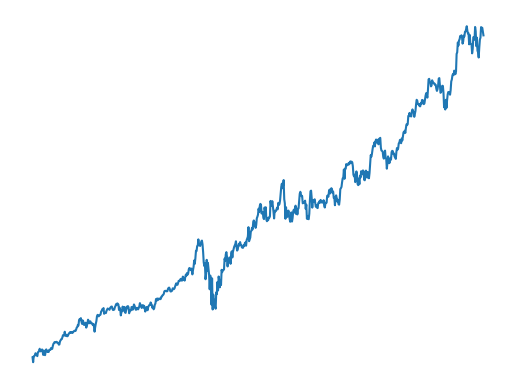

In [3]:
import matplotlib.pyplot as plt

x = df.index
y = df['Close']

plt.plot(x, y)
plt.axis('off')
# plt.xticks(x, x, rotation='vertical')
plt.show()

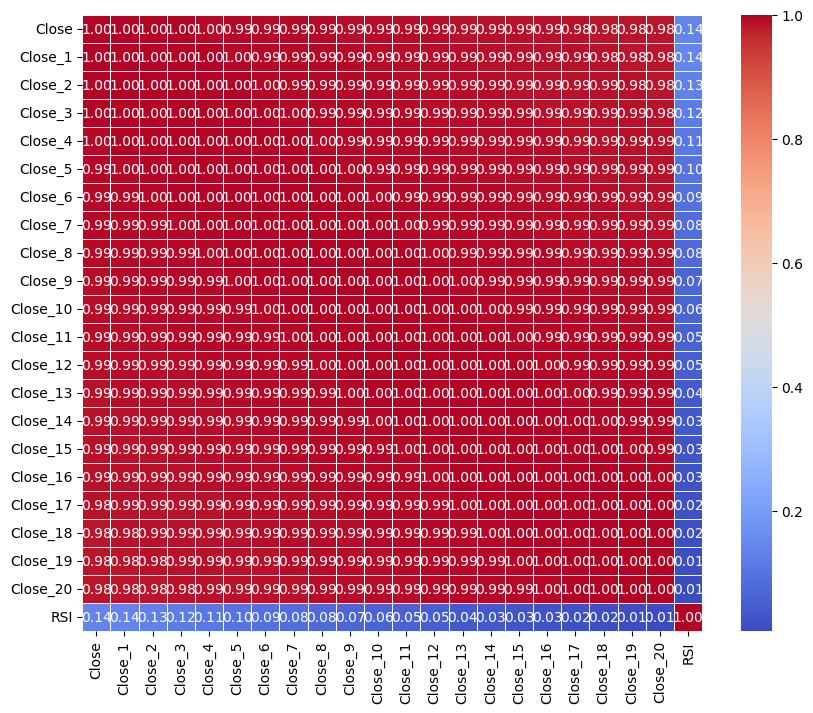

In [4]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

From this heatmap, we can choose manually feature with high correlation to 'Low' for training

# Train Test Split

In [5]:
train_date = '2021-01-01'
df_train = df[df.index <= train_date]
df_test = df[df.index >= train_date]
df_train.shape, df_test.shape

((505, 22), (252, 22))

In [6]:
pred_col = 'Close'

In [7]:
feature_col = [] # Columns feature for training
for col in df.columns:
    if (col != 'Close' and col != pred_col):
        feature_col.append(col)
feature_col

['Close_1',
 'Close_2',
 'Close_3',
 'Close_4',
 'Close_5',
 'Close_6',
 'Close_7',
 'Close_8',
 'Close_9',
 'Close_10',
 'Close_11',
 'Close_12',
 'Close_13',
 'Close_14',
 'Close_15',
 'Close_16',
 'Close_17',
 'Close_18',
 'Close_19',
 'Close_20',
 'RSI']

In [8]:
y_train = df_train[pred_col].to_numpy()
X_train = df_train[feature_col].to_numpy()
y_test = df_test[pred_col].to_numpy()
X_test = df_test[feature_col].to_numpy()

In [9]:
X = df[feature_col].to_numpy()
y = df[pred_col].to_numpy()

# Parameter Setting

In [10]:
K_fold = 5 # K fold for cross validation, K fold = Train set
lamda = 1 # Ridge parameter
rf_depth = 22 # Random Forest depth
dt_depth = 38 # Decision Tree depth
hidden_layer_size = 300 # MLP hidden layer size

# Function

In [11]:
def command(y_pred_trend,y_true_price):
    command = []
    command_long = []
    command_short = []
    rate_by_time = []
    position = []
    rate_certain_time = []
    rate = 0
    pred=0
    pos=0
    count = 0
    for i in range(len(y_true_price)):
        if  y_pred_trend[i]==1:
                command.append(1)
                command_long.append(1)
                command_short.append(0)
                if pred !=1:
                    rate = rate + (y_true_price[i]-pos)*pred-0.15
                    pos =y_true_price[i]
                    count+=1
                pred=1
                position.append(pos)
                rate_by_time.append(rate)
        elif  y_pred_trend[i]==-1:
                command.append(-1)
                command_long.append(0)
                command_short.append(1)
                if pred !=-1:
                    rate = rate + (y_true_price[i]-pos)*pred-0.15
                    pos =y_true_price[i]
                    count+=1
                pred = -1
                position.append(pos)
                rate_by_time.append(rate)
        else:
            command.append(0)
            command_long.append(0)
            command_short.append(0)
            if pred != 0:
                rate = rate+ pred*(y_true_price[i]-pos)
            pred = 0
            pos =0
            position.append(pos)
            rate_by_time.append(rate)
    return [y_true_price,command,command_long,command_short,rate_by_time,position], count

In [12]:
import numpy as np
def portfolio_pnl_future(position_long, position_short, Close):
    a=0
    fee=[0]
    for i in range(1,len(t.L)):
        if t.L[i-1]>t.L[i] or t.S[i-1]>t.S[i]:
            a=a+1
            fee.append(a*0.15)
        else:
            fee.append(a*0.15)
    intitial_capital_long = (position_long.iloc[0])*(Close.iloc[0])
    cash_long = (position_long.diff()*Close)
    cash_long[0] = intitial_capital_long
    cash_cs_long = cash_long.cumsum()
    portfolio_value_long = (position_long *Close)

    intitial_capital_short = (position_short.iloc[0])*(Close.iloc[0])
    cash_short = (position_short.diff()* Close)
    cash_short[0] = intitial_capital_short
    cash_cs_short = cash_short.cumsum()
    portfolio_value_short = (position_short* Close)

    backtest = (portfolio_value_long - cash_cs_long).iloc[1:] + (cash_cs_short - portfolio_value_short).iloc[1:]
    cash_max = (cash_long + cash_short).max()
    pnl =  backtest/cash_max

    return backtest, cash_max, pnl
def Sharp(pnl):
    r = pnl.diff(1)
    return np.abs(r.mean())/r.std() * np.sqrt(252)

def maximum_drawdown_future(backtest, cash_max):
    return (backtest.cummax() - backtest).max(), (backtest.cummax() - backtest).max()/cash_max

In [13]:
def Margin(test):
    test = test.copy()
    test['backtest'] = portfolio_pnl_future(test.L, test.S, test.Close)[0]
    test['inLong'] = test.L.diff()[test.L.diff() > 0].astype(int)
    test['inShort'] = test.S.diff()[test.S.diff() > 0].astype(int)
    test['outLong'] = -test.L.diff()[test.L.diff() < 0].astype(int)
    test['outShort'] = -test.S.diff()[test.S.diff() < 0].astype(int)
    test.loc[test.index[0], 'inLong'] = test.L.iloc[0]
    test.loc[test.index[0], 'inShort'] = test.S.iloc[0]
    test.fillna(0, inplace=True)
    # try:
    #     return test.Total_Gain.iloc[-1]/(test.inLong * test.Close + test.inShort * test.Close + test.outLong * test.Close + test.outShort * test.Close).sum()*10000
    # except:
    return test, test.backtest.iloc[-1]/(test.inLong * test.Close + test.inShort * test.Close + test.outLong * test.Close + test.outShort * test.Close).sum()*10000

def HitRate(test):
    test = test.copy()
    test['backtest'] = portfolio_pnl_future(test.L, test.S, test.Close)[0]
    test, margin = Margin(test)
    test['L_diff'] = test.L.diff()
    test['S_diff'] = test.S.diff()
    inLong = test.Close.iloc[0]
    inShort = test.Close.iloc[0]

    for i in range(len(test)):
        if test.L_diff.iloc[i] == 1:
            inLong = test.Close.iloc[i]
        if test.S_diff.iloc[i] == 1:
            inShort = test.Close.iloc[i]
        if test.L_diff.iloc[i] == -1:
            outLong = test.Close.iloc[i] - inLong
            test.loc[test.index[i], 'Gain'] = outLong
        if test.S_diff.iloc[i] == -1:
            outShort = inShort - test.Close.iloc[i]
            test.loc[test.index[i], 'Gain'] = outShort

    print(len(test[test.Gain > 0])/(len(test[test.inLong == 1]) + len(test[test.inShort == 1])))


In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import math
def cross_val_score(model, X, y, cv=K_fold):
    mae = []
    mse = []
    r2 = []
    rmse = []
    for i in range(1, cv+1):
        from_idx = int(len(X)*(i-1)/cv)
        to_idx = int(len(X)*i/cv)
        X_test = X[from_idx:to_idx]
        X_train = np.concatenate((X[:from_idx], X[to_idx:]))
        y_test = y[from_idx:to_idx]
        y_train = np.concatenate((y[:from_idx], y[to_idx:]))
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2.append(r2_score(y_test, y_pred))
        mae.append(mean_absolute_error(y_test,y_pred))
        mse.append(mean_squared_error(y_test,y_pred))
        rmse.append(mean_squared_error(y_test,y_pred, squared=False))
    return [sum(r2)/len(r2), sum(mae)/len(mae), sum(mse)/len(mse), sum(rmse)/len(rmse)]


# Ridge

In [15]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=lamda)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

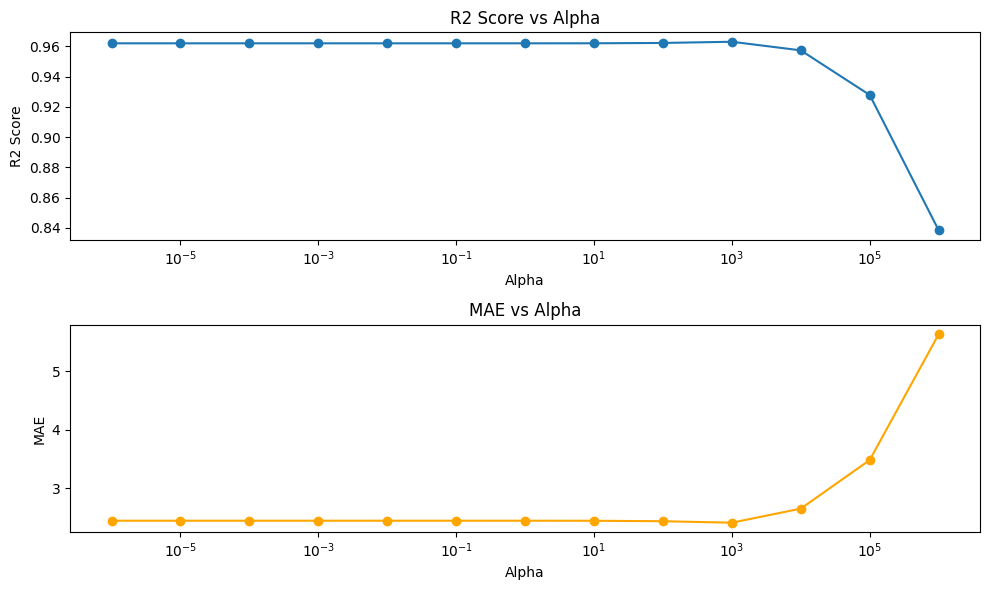

In [16]:
alphas = np.logspace(-6, 6, 13)

# Lists to store results
r2_scores = []
mae_scores = []

# Loop through alpha values and train Ridge Regression models
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ridge.predict(X_test)

    # Calculate R2 score and MAE
    r2 = cross_val_score(ridge, X, y, cv=K_fold)[0]
    mae = cross_val_score(ridge, X, y, cv=K_fold)[1]

    r2_scores.append(r2)
    mae_scores.append(mae)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Alpha')

plt.subplot(2, 1, 2)
plt.plot(alphas, mae_scores, marker='o', color='orange')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('MAE vs Alpha')

plt.tight_layout()
plt.show()

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=dt_depth)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

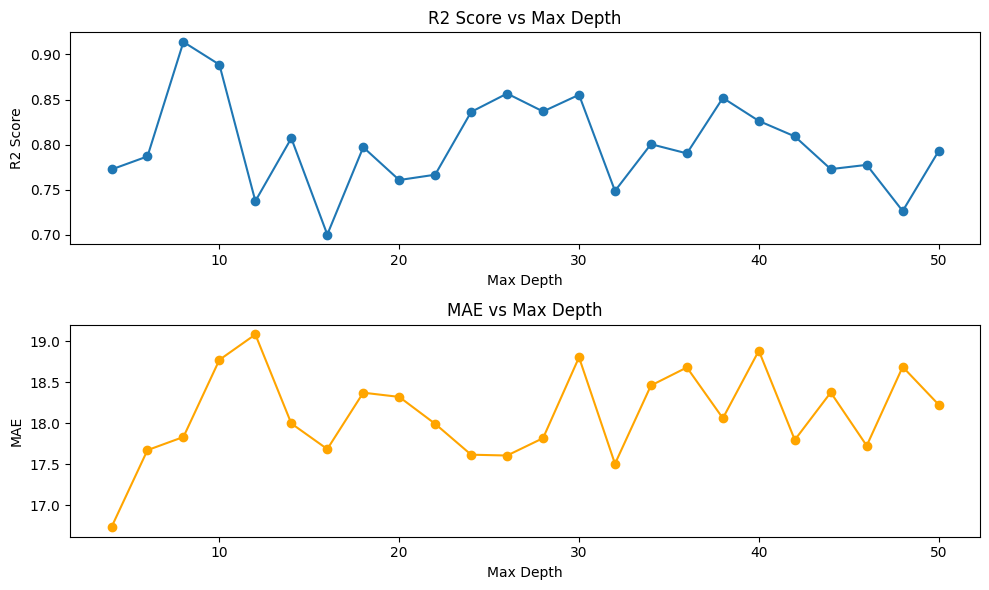

In [18]:
max_depths = np.arange(4, 51, 2)

# Lists to store results
r2_scores = []
mae_scores = []

# Loop through max depths and train Decision Tree models
for depth in max_depths:
    dtree = DecisionTreeRegressor(max_depth=depth)
    dtree.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = dtree.predict(X_test)

    # Calculate R2 score and MAE
    r2 = cross_val_score(dtree, X, y, cv=K_fold)[0]
    mae = cross_val_score(dtree, X, y, cv=K_fold)[1]

    r2_scores.append(r2)
    mae_scores.append(mae)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(max_depths, r2_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Max Depth')

plt.subplot(2, 1, 2)
plt.plot(max_depths, mae_scores, marker='o', color='orange')
plt.xlabel('Max Depth')
plt.ylabel('MAE')
plt.title('MAE vs Max Depth')

plt.tight_layout()
plt.show()

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=rf_depth)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

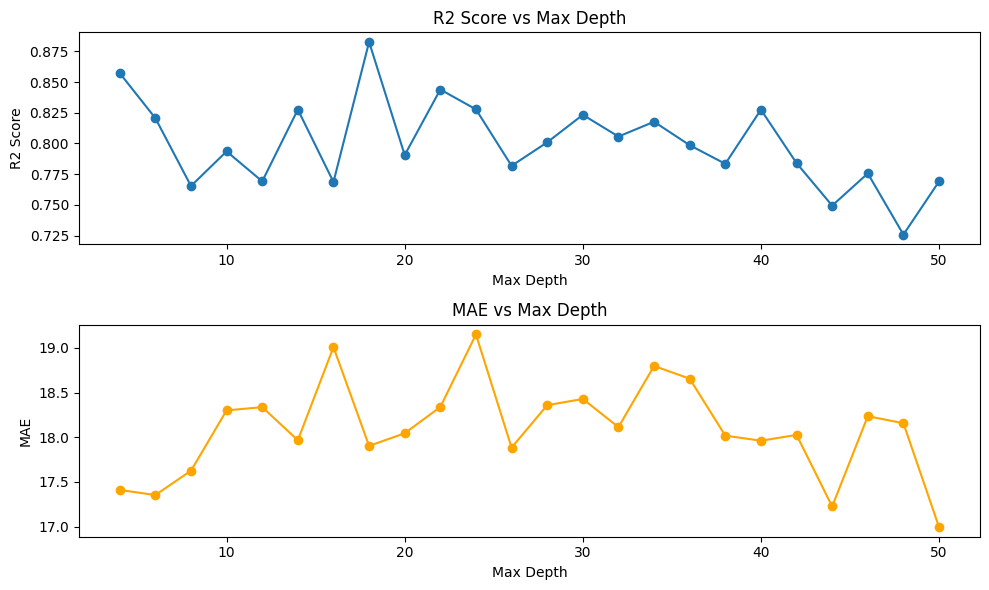

In [20]:
max_depths = np.arange(4, 51, 2)

# Lists to store results
r2_scores = []
mae_scores = []

# Loop through max depths and train Decision Tree models
for depth in max_depths:
    rf = DecisionTreeRegressor(max_depth=depth)
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)

    # Calculate R2 score and MAE
    r2 = cross_val_score(rf, X, y, cv=K_fold)[0]
    mae = cross_val_score(rf, X, y, cv=K_fold)[1]

    r2_scores.append(r2)
    mae_scores.append(mae)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(max_depths, r2_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Max Depth')

plt.subplot(2, 1, 2)
plt.plot(max_depths, mae_scores, marker='o', color='orange')
plt.xlabel('Max Depth')
plt.ylabel('MAE')
plt.title('MAE vs Max Depth')

plt.tight_layout()
plt.show()

# MLP

In [21]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(hidden_layer_size, hidden_layer_size), activation='relu', max_iter=500, random_state=42, learning_rate='adaptive')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


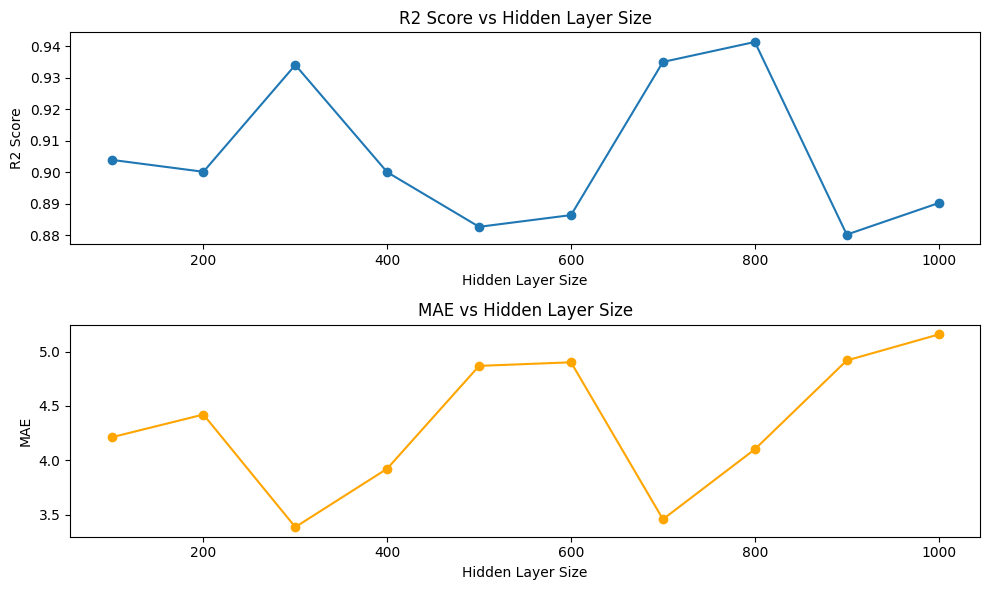

In [22]:
hidden_layer_sizes_values = range(100, 1100, 100)

# Lists to store results
r2_scores = []
mae_scores = []

# Loop through max depths and train Decision Tree models
for n in hidden_layer_sizes_values:
    mlp = MLPRegressor(hidden_layer_sizes=(n, n), activation='relu', max_iter=500, random_state=42, learning_rate='adaptive')
    mlp.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = mlp.predict(X_test)

    # Calculate R2 score and MAE
    r2 = cross_val_score(mlp, X, y, cv=K_fold)[0]
    mae = cross_val_score(mlp, X, y, cv=K_fold)[1]

    r2_scores.append(r2)
    mae_scores.append(mae)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(hidden_layer_sizes_values, r2_scores, marker='o')
plt.xlabel('Hidden Layer Size')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Hidden Layer Size')

plt.subplot(2, 1, 2)
plt.plot(hidden_layer_sizes_values, mae_scores, marker='o', color='orange')
plt.xlabel('Hidden Layer Size')
plt.ylabel('MAE')
plt.title('MAE vs Hidden Layer Size')

plt.tight_layout()
plt.show()

# Ensemble Model

In [28]:
from sklearn.ensemble import StackingRegressor

ensemble_model = StackingRegressor(
    estimators=[('ridge', ridge), ('dtree', dtree), ('rf', rf), ('mlp', mlp)]
)

# Fit the ensemble model to the training data
ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)

# Cross Validation

In [30]:
ridge_loss = cross_val_score(ridge, X, y, cv=K_fold)
dtree_loss = cross_val_score(dtree, X, y, cv=K_fold)
rf_loss = cross_val_score(rf, X, y, cv=K_fold)
mlp_loss = cross_val_score(mlp, X, y, cv=K_fold)
ensemble_loss = cross_val_score(ensemble_model, X, y, cv=K_fold)

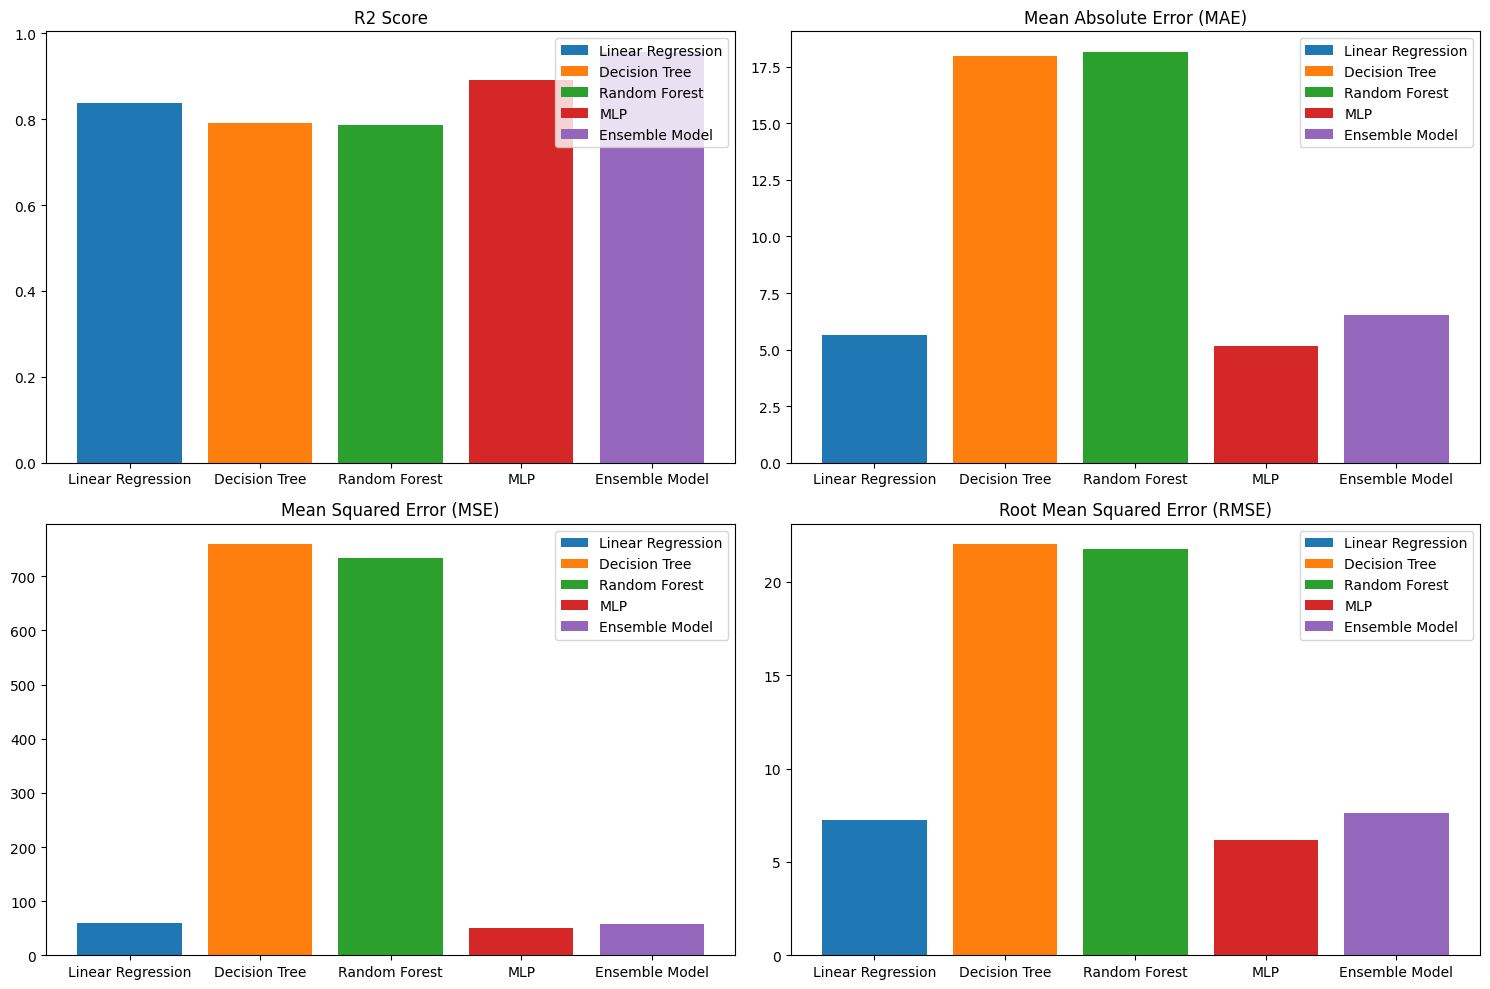

In [31]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['R2 Score', 'Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)']

N = len(metrics)
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'MLP', 'Ensemble Model']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i in range(N):
    row, col = divmod(i, 2)
    bars = np.array([ridge_loss[i], dtree_loss[i], rf_loss[i], mlp_loss[i], ensemble_loss[i]])
    for j, model in enumerate(models):
        axes[row, col].bar(model, bars[j], label=model)

    axes[row, col].set_title(metrics[i])
    axes[row, col].legend()

plt.tight_layout()
plt.show()
